# Registered Firearms per State (USA) - Homework 1IAS21
In this homework we will plot the number of Registered Firearms that every state has in the US - as DDSm, PSM, and Choropleth.

## Imports
First, we import all packages that we need

In [100]:
import geopandas as gpd
import pandas as pd
from thefuzz.process import extractOne as best
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from thefuzz import process


## Data
Now we import the data that we will be using. We are using GeoJson https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html 

<Axes: >

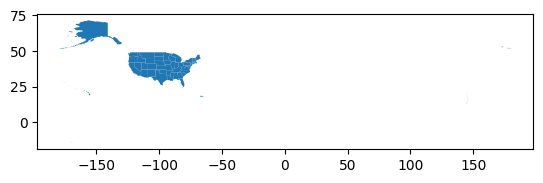

In [101]:
linkGitMap='https://raw.githubusercontent.com/vinconig/1IAS21-3/main/us-state-boundaries.geojson'
usstates=gpd.read_file(linkGitMap)
usstates.rename(columns={"name": "State"}, inplace=True)
usstates.tail()
usstates.plot() #yay, our gound map

As we can see, since the US has a lot of territories, this makes the map cumbersome to visualize. Lets see if we get lucky with our dataset, so that we do not have datapoints to visualize for those states later...


And the numer of registered firearms by state from statista: https://www.statista.com/statistics/215655/number-of-registered-weapons-in-the-us-by-state/?srsltid=AfmBOoqcgMI7RLbSfGFsvQr-vL3SjZwEmSPNKu30kUml6l6aBFJtO0nt . We will access it from my personal but public GitHub

In [102]:
linkGitData='https://raw.githubusercontent.com/vinconig/1IAS21-3/main/us_states_values.csv'
RegFa=pd.read_csv(linkGitData, sep=',')

RegFa.rename(columns={"Value": "NumRegFa"}, inplace=True)
RegFa.head()

,State,NumRegFa
0,Texas,1136732
1,Florida,631809
2,Virginia,479582
3,California,418971
4,Georgia,377800


## Merge Data
In the next step, we want to merge the data, based on the column "State"

First, let's see which ones are in the Number of registered Firearms Dataframe (DF), but arent in the World Geographic Data Frame (GDF). (Exact match)

In [103]:
onlyDF = set(RegFa.State)-set(usstates.State)
onlyDF


set()

Luckily, nothing that doesnt match, so we are good to go. Maybe if we delete the states that dont have data from the dataset the visualization gets better

In [104]:
onlyGDF = set(usstates.State)-set(RegFa.State)
onlyGDF


{'American Samoa',
 'Commonwealth of the Northern Mariana Islands',
 'Guam',
 'Puerto Rico',
 'United States Virgin Islands'}

In [105]:
# Drop rows where State is in onlyGDF
usstates = usstates[~usstates["State"].isin(onlyGDF)]

But now we can finally merge the two. The US Package will stay the same (operation left) but we will add the Number of Registered Firearms Data to it

In [106]:
theMapAndData=usstates.merge(RegFa, on='State', how="left")
theMapAndData.tail()

,gid,arealand,division,intptlat,State,objectid,areawater,intptlon,oid,funcstat,...,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry,NumRegFa
46,9,-1938121641,8,42.991802,Wyoming,31,1861259579,-107.541926,-1857883199,A,...,01779807,42.996099,Wyoming,G4000,4,00,56,"{ ""lon"": -107.551330644, ""lat"": 42.9995710878 }","POLYGON ((-111.04489 43.31572, -111.04654 43.9...",84499
47,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,01779806,44.627322,Wisconsin,G4000,2,00,55,"{ ""lon"": -89.732894645900004, ""lat"": 44.639893...","POLYGON ((-92.88707 45.64415, -92.8825 45.6594...",118131
48,45,-342263542,1,41.579778,Connecticut,11,1815476291,-72.746667,-1753705891,A,...,01779780,41.575144,Connecticut,G4000,1,00,09,"{ ""lon"": -72.738273382000003, ""lat"": 41.575019...","POLYGON ((-73.51808 41.66672, -73.49223 41.967...",93297
49,26,1793942590,2,42.913397,New York,39,2063248491,-75.596272,-1984827836,A,...,01779796,42.919793,New York,G4000,1,00,36,"{ ""lon"": -75.596516371600003, ""lat"": 42.921224...","MULTIPOLYGON (((-79.31214 42.68681, -78.99976 ...",92965
50,41,-698155119,8,44.348422,Idaho,7,-1903599535,-114.558854,-1954881512,A,...,01779783,44.352406,Idaho,G4000,4,00,16,"{ ""lon"": -114.65939986799999, ""lat"": 44.388926...","POLYGON ((-116.89971 44.84061, -116.89625 44.8...",97528


## Plots
Let's get to plotting!

<Axes: >

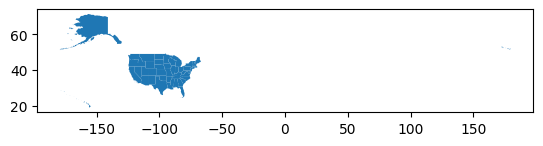

In [107]:
theMapAndData.plot() #yay, our gound map

### Diagrama de Dispersión de Mapas
First, we use the technique that we learned in the course for the dots, showing density. the dot value will be 1 as our numbers are so small, and 1 is even the most common in our dataset. We first have to throw out all the NaNs and 0es, otherwise it doesnt work. We will create a new DF for this

In [108]:
justDots=theMapAndData.copy()
dot_value = 10000
justDots = justDots.dropna(subset=["NumRegFa"])
justDots["num_dots"] = (justDots["NumRegFa"] / dot_value).astype(int) + 1
justDots = justDots[justDots["num_dots"] > 0]
justDots.head()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)
justDots.reset_index(drop=True, inplace=True)
World_dots=gpd.GeoDataFrame(geometry=justDots)


Now the plot


<Axes: >

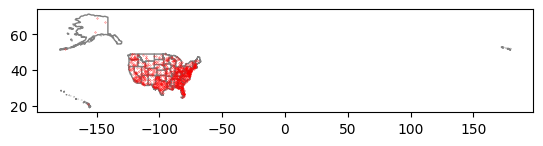

In [109]:
base=theMapAndData.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
World_dots.plot(markersize=0.05, color='red',ax=base)

### Proporción Simple de Mapas
Next: a proportional dot plot. We will be using matplotlib here because its easier. The centeroids were not manually adjusted, so they arent perfect.


/var/folders/4s/_4bl0c291990qqkpvgrj459r0000gn/T/ipykernel_65339/3836586000.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  theMapAndData["centroid"] = theMapAndData.geometry.centroid
/var/folders/4s/_4bl0c291990qqkpvgrj459r0000gn/T/ipykernel_65339/3836586000.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  theMapAndData.centroid.plot(


<Axes: >

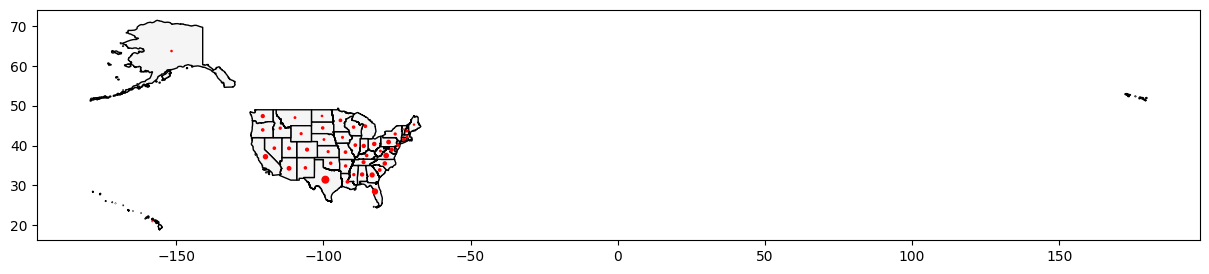

In [110]:
# compute centroids
theMapAndData["centroid"] = theMapAndData.geometry.centroid

# plot base map
fig, ax = plt.subplots(figsize=(15, 10))
theMapAndData.plot(ax=ax, color="whitesmoke", edgecolor="black")

# plot dots
theMapAndData.centroid.plot(
    ax=ax,
    color="red",
    markersize=theMapAndData["NumRegFa"] * 0.00002,
    zorder=5
)

### Choropleth
Last but not least, a choropleth map. a proportional dot plot. We will be using matplotlib here because its easier. The data here is normalized

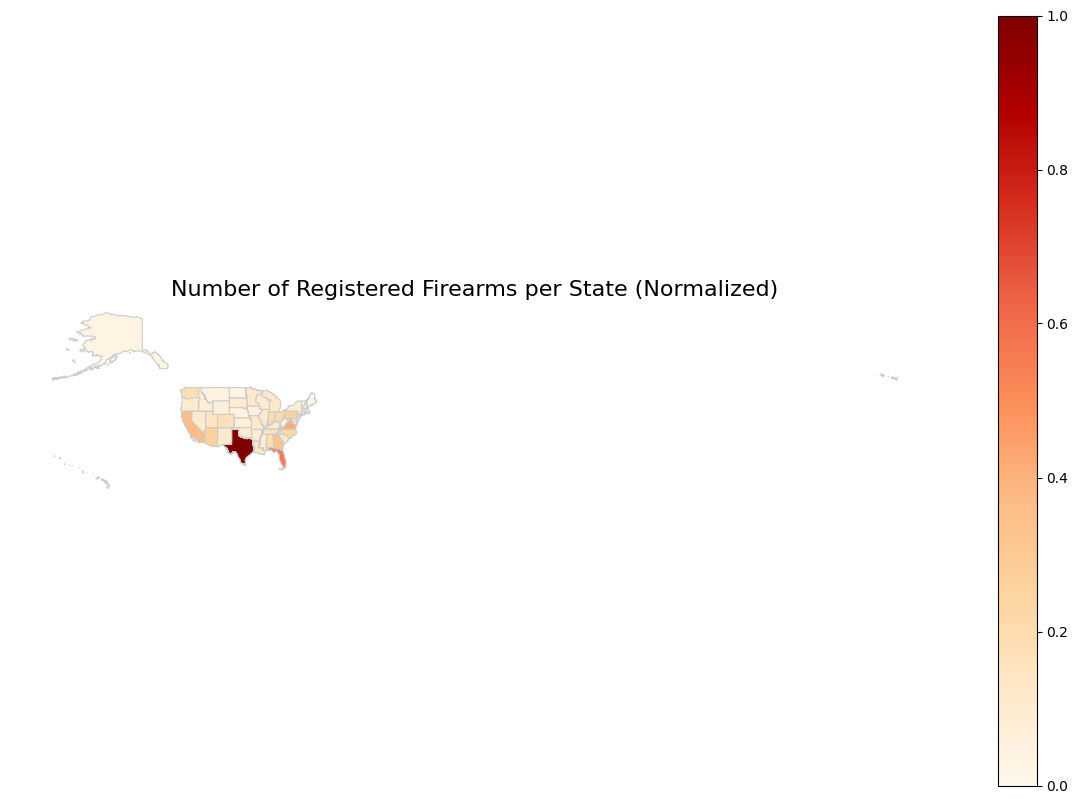

In [111]:

fig, ax = plt.subplots(figsize=(15, 10))

theMapAndData.plot(
    column=(theMapAndData["NumRegFa"] - theMapAndData["NumRegFa"].min()) /
           (theMapAndData["NumRegFa"].max() - theMapAndData["NumRegFa"].min()),
    cmap="OrRd",               # color map ("Oranges-Red")
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,               # add legend
    missing_kwds={             # style for missing values
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

ax.set_title("Number of Registered Firearms per State (Normalized)", fontsize=16)
ax.axis("off")
plt.show()


### Choropleth with Discretization
Last but not least, a choropleth map. a proportional dot plot. We will be using matplotlib here because its easier. The data here is discretisized

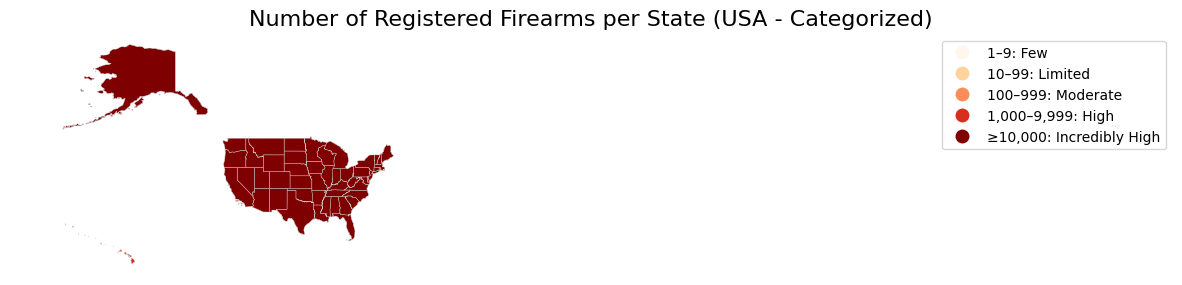

In [112]:
# Define bins and labels
bins = [1, 10, 100, 1000, 10000, float("inf")]
labels = [
    "1–9: Few",
    "10–99: Limited",
    "100–999: Moderate",
    "1,000–9,999: High",
    "≥10,000: Incredibly High"
]

# Discretize into categories
theMapAndData["HeliportsCategory"] = pd.cut(
    theMapAndData["NumRegFa"],
    bins=bins,
    labels=labels,
    right=False  # interval is [lower, upper)
)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
theMapAndData.plot(
    column="HeliportsCategory",
    cmap="OrRd",
    linewidth=0.3,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    categorical=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data, or potentially 0"
    }
)

ax.set_title("Number of Registered Firearms per State (USA - Categorized)", fontsize=16)
ax.axis("off")
plt.show()
